# Tutorial on normality of errors ver2

ELEN 520 Introduction to machine learning

Radhika Grover
Santa Clara University

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

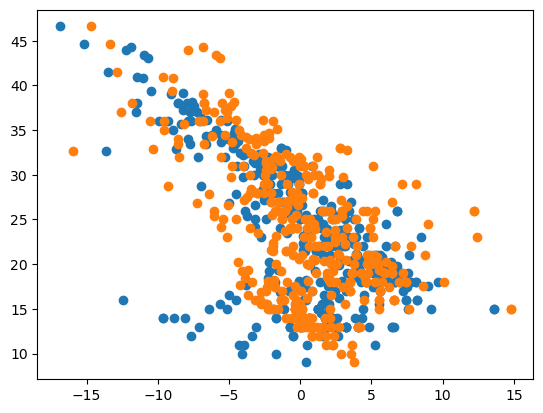

In [2]:
df = pd.read_csv('Auto.csv').sort_values('horsepower')

#create a linear model (model1)
lm_fit1 = smf.ols('mpg~horsepower', data = df).fit()

#create a non-linear model (model2)
lm_fit2 = smf.ols('mpg~horsepower+np.power(horsepower, 2)', data = df).fit()

# find the predicted response for model 1
y_pred1 = lm_fit1.predict(df.horsepower)
# find the predicted response for model 2
y_pred2 = lm_fit2.predict(df.horsepower)

# find the residuals for model 1
residual1 = y_pred1 - df.mpg
# find the residuals for model 2
residual2 = y_pred2 - df.mpg

# create the scatter plots of the residuals for both models
plt.scatter(residual1, df.mpg)
plt.scatter(residual2, df.mpg)


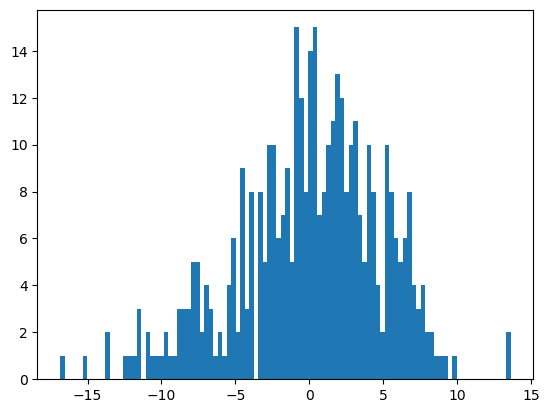

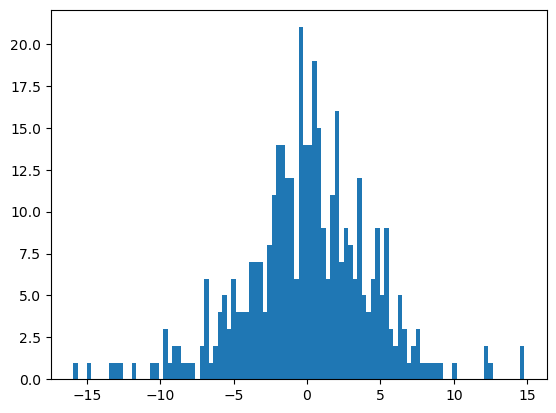

4.912009899515474


In [3]:
# Create a histogram plot of the residuals. Check if the shape of the plot resembles
# that of a normal distribution
# The first argument is residual, second argument is number of bins. 
plt.hist(residual1, bins=100)
plt.show()
plt.hist(residual2, bins=100)
plt.show()
print(np.std(residual1))

#### Construct a Q-Q plot for residuals in model 1
1. Sort the residuals in ascending order
2. Find the z-scores for N+1 quantiles from the normal distribution
3. Construct a Q-Q plot with z-scores on the x-axis and residuals on the y-axis

In [4]:
#1. Sort residual1 to get a series
sorted_residual1 = residual1.sort_values()
sorted_residual1

322   -16.858631
329   -15.176185
333   -13.596693
309   -13.505179
116   -12.456842
         ...    
366     8.965828
128     9.184172
200     9.677267
155    13.629929
154    13.629929
Length: 397, dtype: float64

In [5]:
# find the number of observations (residuals)
n = sorted_residual1.size
# find the nu
n

397

Convert any percentage to a decimal for quantile q
$$q = \dfrac{k}{n+1}$$
or 
$$k  = q * (n+1)$$
To find 20% quantile, set q = 0.2
k = 0.2 (397+1) = 79.6
Round up k to 80. This is the item with index 79 in the sorted array is -3.9578 and 20% of the data values lie below it.<br>
```print(sorted_residual1.iloc[79])```

In [6]:
sorted_residual1.iloc[79]

-3.879929097083359

In [7]:
import numpy as np
# Or use the quantile formula with a series to find the 20% quantile
print("The quantile is", residual1.quantile(0.2))

# Alternately, use numpy's np.quantile method
print("The quantile is", np.quantile(residual1, 0.2, method='closest_observation'))

The quantile is -3.871210259271823
The quantile is -3.9578410174831333


In [8]:
import pandas as pd
# store the 0.01, 0.02, 0.03, ...0.98 quantiles for residual1 in X1
X1 = []
for k in np.arange(0.01, 0.99, 0.01):
    X1.append(np.quantile(residual1, k, method='closest_observation'))

# display the quantiles in residual1
print("quantile", "residual1 value", sep="    ")

for k in range(0, len(X1)):
    print(.01*(k+1),   X1[k], sep="      ")

quantile    residual1 value
0.01      -13.50517880852825
0.02      -11.54561136574127
0.03      -10.959421833405457
0.04      -9.662956997574511
0.05      -8.910503226438014
0.06      -8.576185495095924
0.07      -8.075186649316372
0.08      -7.734962529921738
0.09      -7.564746251315228
0.1      -7.180719505044525
0.11      -6.976185495095923
0.12      -6.375977057277538
0.13      -5.564746251315228
0.14      -5.252516599573369
0.15      -5.017990430412887
0.16      -4.658631425444295
0.17      -4.552516599573366
0.18      -4.376185495095921
0.19      -4.075186649316372
0.2      -3.9578410174831333
0.21      -3.7562602015607993
0.22      -3.209712818476852
0.23      -3.146401773702433
0.24      -2.930220082154751
0.25      -2.7464017737024307
0.26      -2.62805729608964
0.27      -2.521942470218711
0.28      -2.258631425444296
0.29      -2.2280572960896414
0.3      -2.1166180523089437
0.31      -1.9105032264380135
0.32      -1.7241052562838206
0.33      -1.576185495095924
0.34      -

### 1. create a normal distribution
2. Segment the curve into n+1 equal sized areas (n = 397 in our example)
3. Find the z-scores for each segment

In [9]:
# create a standard normal distribution with n segments
np.random.seed(42)
population_size  = n  # 398
mu = 0  # mean of the normal distribution
sigma = 1 # std dev of the normal distribution
X = pd.Series(np.random.normal(mu, sigma, size=population_size)).sort_values()
# z score is (X - mu)/sigma, so it is the same as the X values in this case
X.shape, sorted_residual1.size


((397,), 397)

# Method 1 to create QQ plot:
Plot the sorted_residuals on the y-axis and the z-scores on the x - axis
To use this method, the number of points in the datasets must be the same and they must be sorted in ascending order

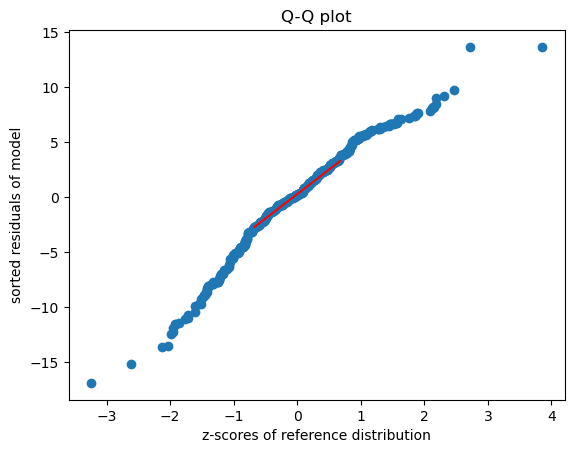

In [10]:
import scipy.stats
plt.scatter(X, sorted_residual1)
plt.title("Q-Q plot")
plt.xlabel('z-scores of reference distribution')
plt.ylabel('sorted residuals of model');

#overlay a line that connects the 0.25 and 0.75 quantiles
plt.plot([scipy.stats.norm.ppf(0.25),scipy.stats.norm.ppf(0.75)], [ residual1.quantile(0.25), residual1.quantile(0.75)], color = "red")

# Method 2 to create the QQ plot:
We will find the quantiles for the normal distribution using the ppf function and store them in Y1. Then find the quantiles for the residual1 using the quantile function in numpy and store them in X1. After this, create a scatter plot of X1 and Y1.

In [11]:
# Find the quantiles for the normal distribution using the ppf function of scipy.stats
import scipy.stats
import numpy as np
Y1 = []

 # store the z values for 0.01, 0.02, ..0.98 quantiles in Y1
for k in np.arange(0.01, 0.99, 0.01):
    Y1.append(scipy.stats.norm.ppf(k)) 

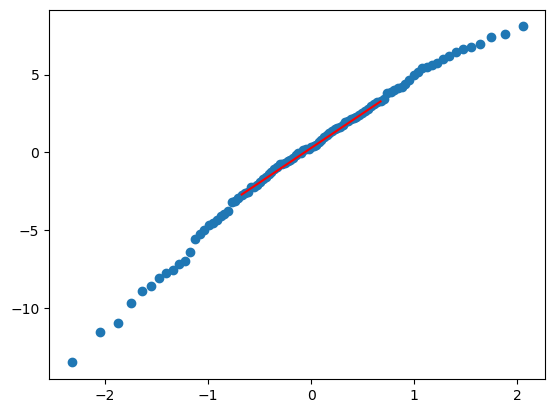

In [12]:
# Create a QQ plot using the quantiles stored in Y1 and X1 
import matplotlib.pyplot as plt
plt.scatter(Y1, X1)  # this the QQ plot

#overlay a line that connects the 0.25 and 0.75 quantiles in residual1 with the normal distribution
plt.plot([scipy.stats.norm.ppf(0.25),scipy.stats.norm.ppf(0.75)], [ residual1.quantile(0.25), residual1.quantile(0.75)], color = "red")

# Method 3 (simplest option): Use the QQplot function
This is the simplest way to create the qqplot. It requires providing the dataset that has to be compared with the normal distribution to the QQplot function. By default, the dataset is compared with the normal distribution
https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html#statsmodels.graphics.gofplots.qqplot

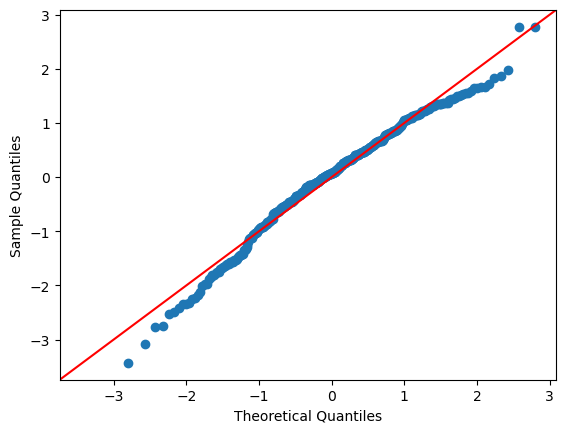

In [13]:
# Create a QQ plot using the qqplot method and compare with the above plot
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.qqplot(residual1,  line='45', fit='True', loc = 0, scale = 1)


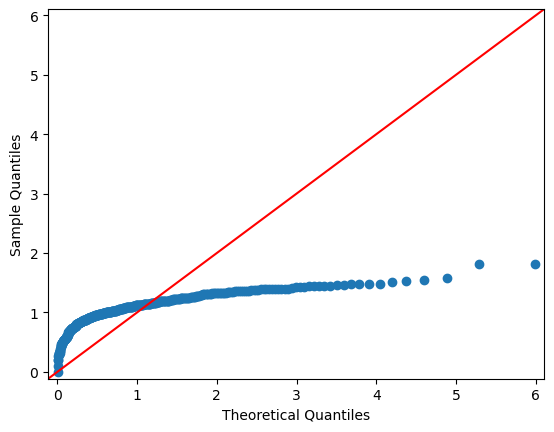

In [14]:
# compare with exponential distribution
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.qqplot(residual1, dist=scipy.stats.expon, line='45', fit='True', loc = 0, scale = 1)

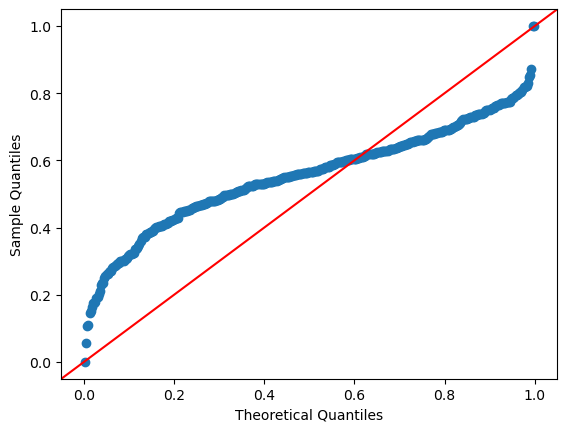

In [15]:
#compare with the normal distribution
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.qqplot(residual1, dist=scipy.stats.uniform,  line='45', fit='True', loc = 0, scale = 1)